In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


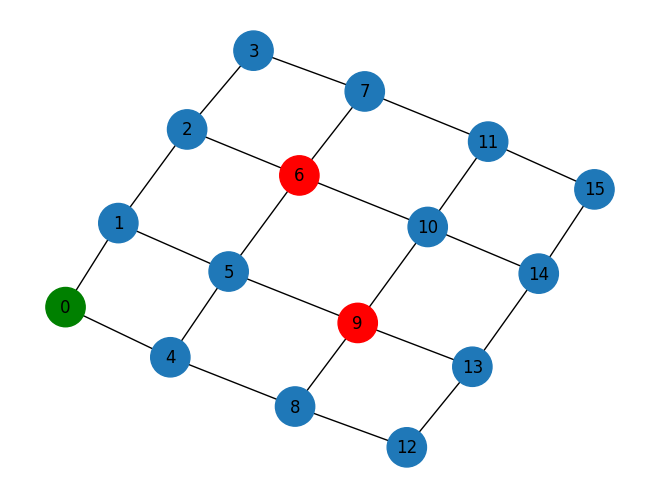

Final Slice 1 Paths: [[9, 5, 1, 0]]
Final Slice 2 Paths: [[6, 5, 4, 0]]


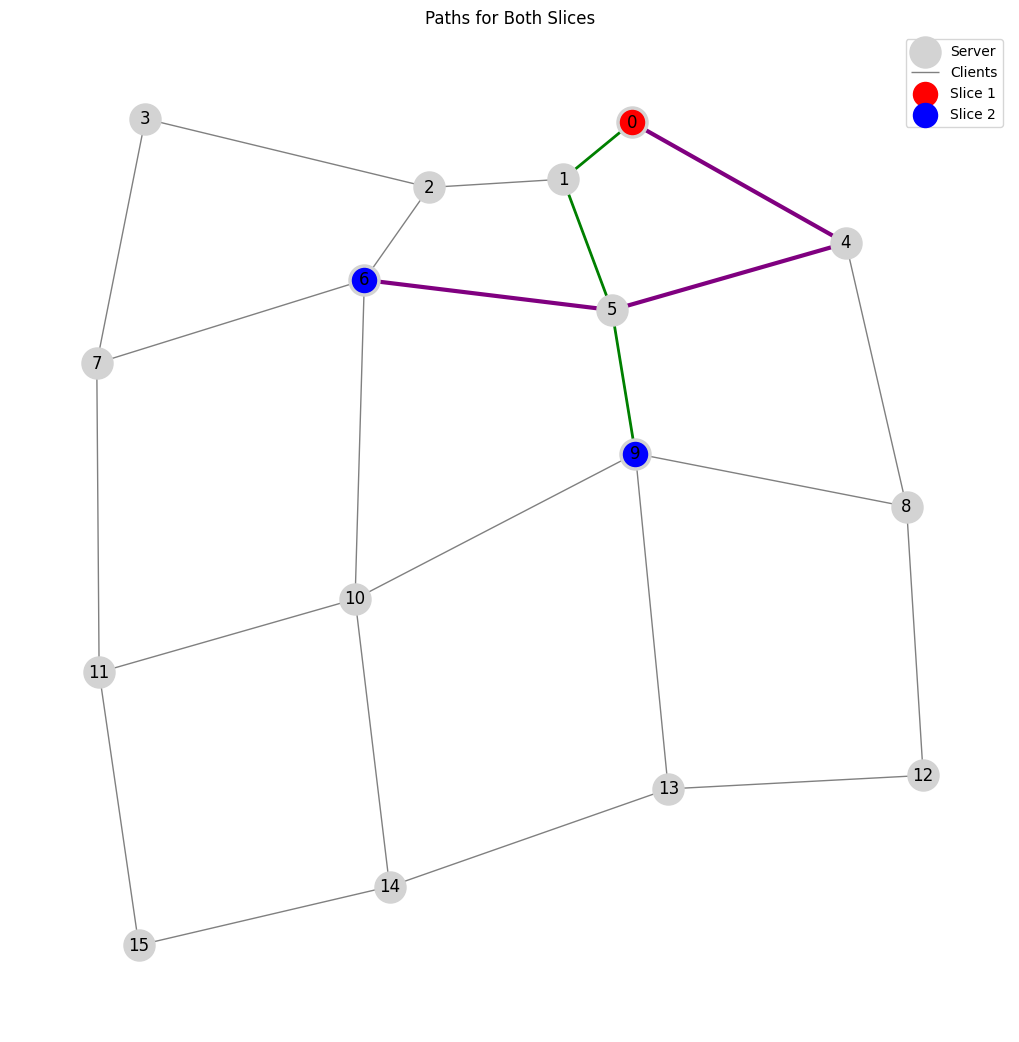

In [2]:
rede = Network()
controlador = Controller(rede)
# Configura uma grade 4x4, clientes nos cantos e um servidor no nó 5
clients = [9, 6]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)
# Desenhe a rede
rede.draw()
# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



In [3]:
# Aqui já temos as rotas calculadas após a execução de run_slice_simulation
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

# Inicializar o controlador passando as rotas calculadas
controlador.initialize_slices(network=rede, clients=[9, 6], server=0, protocols=["BFK_BQC", "AC_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

# Gerar 5 requisições aleatórias para a rede
for _ in range(5):
    alice_id = random.choice([9,6])  
    bob_id = 0  
    num_qubits = random.randint(3, 5)
    num_gates = random.randint(10, 20)
    rede.generate_request(alice_id, bob_id, num_qubits, num_gates)

# Enviar as requisições para o controlador para mapeamento e agendamento
scheduled_timeslots = rede.send_requests_to_controller(controlador)

# Obter os caminhos dos slices do controlador
slice_paths = controlador.slices  # Rotas já associadas aos slices

# Executar as requisições agendadas na rede
rede.execute_scheduled_requests(scheduled_timeslots)

# Imprimir o relatório detalhado com os caminhos dos slices
controlador.print_report(scheduled_timeslots, slice_paths)


2024-12-03 00:32:10,334: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [9, 5, 1, 0]}
2024-12-03 00:32:10,335: Slice slice_2 configurado para protocolo AC_BQC com rotas: {'client': [6, 5, 4, 0]}
2024-12-03 00:32:10,491: Circuito aleatório gerado com 5 qubits e 14 portas. Instruções sobre o circuito.
2024-12-03 00:32:10,491: Instrução: {'operation': 't', 'qubits': [2]}
2024-12-03 00:32:10,492: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-03 00:32:10,492: Instrução: {'operation': 'cx', 'qubits': [2, 0]}
2024-12-03 00:32:10,493: Instrução: {'operation': 's', 'qubits': [1]}
2024-12-03 00:32:10,493: Instrução: {'operation': 'cx', 'qubits': [1, 3]}
2024-12-03 00:32:10,494: Instrução: {'operation': 'cx', 'qubits': [3, 2]}
2024-12-03 00:32:10,494: Instrução: {'operation': 'cx', 'qubits': [0, 4]}
2024-12-03 00:32:10,494: Instrução: {'operation': 'cx', 'qubits': [1, 4]}
2024-12-03 00:32:10,496: Instrução: {'operation': 'x', 'qubits': [2]}
2024-12-03 00:32:10,496: 

          ┌───┐               ┌───┐                
q_0: ─────┤ X ├────────────■──┤ S ├──────────────■─
     ┌───┐└─┬─┘            │  └───┘              │ 
q_1: ┤ S ├──┼────■─────────┼────■────────────■───┼─
     ├───┤  │    │  ┌───┐  │    │  ┌───┐     │   │ 
q_2: ┤ T ├──■────┼──┤ X ├──┼────┼──┤ X ├─X───┼───┼─
     ├───┤     ┌─┴─┐└─┬─┘  │    │  ├───┤ │   │   │ 
q_3: ┤ Z ├─────┤ X ├──■────┼────┼──┤ X ├─┼───┼───┼─
     └───┘     └───┘     ┌─┴─┐┌─┴─┐└───┘ │ ┌─┴─┐ │ 
q_4: ────────────────────┤ X ├┤ X ├──────X─┤ X ├─■─
                         └───┘└───┘        └───┘   
     ┌───┐                              ┌───┐   ┌───┐     
q_0: ┤ T ├──────────────────────────────┤ X ├───┤ X ├─────
     └───┘          ┌───┐          ┌───┐└─┬─┘   └─┬─┘     
q_1: ──■─────────■──┤ Y ├──────────┤ X ├──┼───■───┼───────
       │  ┌───┐  │  ├───┤          └─┬─┘  │   │   │  ┌───┐
q_2: ──┼──┤ H ├──┼──┤ S ├────────────┼────┼───┼───■──┤ Y ├
       │  ├───┤  │  ├───┤            │    │   │      └───┘
q_3: ──┼──┤ T ├

2024-12-03 00:32:10,686: Circuito aleatório gerado com 5 qubits e 16 portas. Instruções sobre o circuito.
2024-12-03 00:32:10,686: Instrução: {'operation': 'cz', 'qubits': [1, 4]}
2024-12-03 00:32:10,687: Instrução: {'operation': 'cx', 'qubits': [1, 4]}
2024-12-03 00:32:10,688: Instrução: {'operation': 'h', 'qubits': [4]}
2024-12-03 00:32:10,688: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-03 00:32:10,689: Instrução: {'operation': 'h', 'qubits': [2]}
2024-12-03 00:32:10,689: Instrução: {'operation': 't', 'qubits': [4]}
2024-12-03 00:32:10,690: Instrução: {'operation': 't', 'qubits': [3]}
2024-12-03 00:32:10,690: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-03 00:32:10,691: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-03 00:32:10,691: Instrução: {'operation': 's', 'qubits': [2]}
2024-12-03 00:32:10,692: Instrução: {'operation': 's', 'qubits': [4]}
2024-12-03 00:32:10,692: Instrução: {'operation': 'cx', 'qubits': [4, 1]}
2024-12-03 00:32:10,693: Instrução: {'oper

                                 ┌───┐      ┌───┐
q_0: ───────■─────────■────────■─┤ S ├─■──■─┤ T ├
            │  ┌───┐  │  ┌───┐ │ ├───┤ │  │ └───┘
q_1: ──■────┼──┤ T ├──┼──┤ Y ├─┼─┤ S ├─┼──┼──────
     ┌─┴─┐  │  └───┘┌─┴─┐└───┘ │ └───┘ │  │      
q_2: ┤ X ├──┼───────┤ X ├──■───■───────┼──■──────
     └───┘┌─┴─┐     └───┘  │           │         
q_3: ─────┤ X ├────────────■───────────■─────────
          └───┘                                  
     ┌───┐                                     ┌───┐     
q_0: ┤ H ├───────────────X───────────────────X─┤ Z ├──■──
     └───┘        ┌───┐  │                   │ └───┘┌─┴─┐
q_1: ───────■───■─┤ H ├──X────────X──────■───┼──────┤ X ├
            │   │ └───┘┌───┐┌───┐ │      │   │ ┌───┐└───┘
q_2: ───────┼───┼──────┤ X ├┤ X ├─┼──X───┼───X─┤ H ├─────
     ┌───┐┌─┴─┐ │ ┌───┐└─┬─┘└─┬─┘ │  │ ┌─┴─┐   └───┘     
q_3: ┤ X ├┤ X ├─■─┤ X ├──■────┼───X──┼─┤ X ├─────────────
     └─┬─┘├───┤   └───┘       │      │ ├───┤             
q_4: ──■──┤ T ├─────────────

2024-12-03 00:32:10,881: Instrução: {'operation': 'cx', 'qubits': [0, 1]}
2024-12-03 00:32:10,881: Instrução: {'operation': 's', 'qubits': [4]}
2024-12-03 00:32:10,882: Instrução: {'operation': 'h', 'qubits': [2]}
2024-12-03 00:32:10,883: Requisição adicionada: Alice 9 -> Bob 0 com protocolo AC_BQC.
2024-12-03 00:32:10,940: Circuito aleatório gerado com 4 qubits e 10 portas. Instruções sobre o circuito.
2024-12-03 00:32:10,941: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-03 00:32:10,942: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-03 00:32:10,942: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-03 00:32:10,944: Instrução: {'operation': 's', 'qubits': [1]}
2024-12-03 00:32:10,945: Instrução: {'operation': 'swap', 'qubits': [2, 3]}
2024-12-03 00:32:10,946: Instrução: {'operation': 'cz', 'qubits': [1, 0]}
2024-12-03 00:32:10,947: Instrução: {'operation': 'y', 'qubits': [2]}
2024-12-03 00:32:10,948: Instrução: {'operation': 'cx', 'qubits': [1, 0]}
2024-12-03 00:32:10

     ┌───┐          ┌───┐          
q_0: ┤ Y ├───────■──┤ X ├───────■──
     ├───┤┌───┐  │  └─┬─┘       │  
q_1: ┤ Y ├┤ S ├──■────■────■────┼──
     └───┘└───┘┌───┐       │    │  
q_2: ───────X──┤ Y ├───────┼────┼──
     ┌───┐  │  └───┘     ┌─┴─┐┌─┴─┐
q_3: ┤ Z ├──X────────────┤ X ├┤ X ├
     └───┘               └───┘└───┘
Todas as requisições foram enviadas para o controlador.


2024-12-03 00:32:11,108: Usando a rota fornecida: [0, 1, 2, 6]
2024-12-03 00:32:11,109: Timeslot 30: Teletransporte de qubit de 0 para 6 na rota [0, 1, 2, 6] foi bem-sucedido com fidelidade final de 0.897556354744639.
2024-12-03 00:32:11,119: Transmissão e teletransporte de 5 qubits entre 0 e 6 concluídos com sucesso.
2024-12-03 00:32:11,121: Servidor devolveu 5 qubits para o cliente.
2024-12-03 00:32:11,128: Qubit 438 devolvido para o cliente - Estado: 1, Fase: -1
2024-12-03 00:32:11,129: Qubit 603 devolvido para o cliente - Estado: 1, Fase: -1
2024-12-03 00:32:11,129: Qubit 258 devolvido para o cliente - Estado: 1, Fase: -1
2024-12-03 00:32:11,130: Qubit 390 devolvido para o cliente - Estado: 1, Fase: -1
2024-12-03 00:32:11,130: Qubit 74 devolvido para o cliente - Estado: 0, Fase: 1
2024-12-03 00:32:11,131: Timeslot 31.
2024-12-03 00:32:11,131: Cliente aplicou a decodificação Clifford no qubit 438.
2024-12-03 00:32:11,132: Cliente aplicou a decodificação Clifford no qubit 603.
2024-1


=== Relatório de Agendamento e Execução de Requisições ===

Timeslot 1:
  - Alice ID: 9, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 5, Caminho do slice_2: {'client': [6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 2:
  - Alice ID: 6, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 5, Caminho do slice_2: {'client': [6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 3:
  - Alice ID: 9, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 4, Caminho do slice_2: {'client': [6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 4:
  - Alice ID: 9, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 5, Caminho do slice_2: {'client': [6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 5:
  - Alice ID: 9, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 4, Caminho do slice_2: {'client': [6, 5, 4, 0]}
------------------------------------------------------------

=== Fim do Relatório ===



In [4]:
# controlador.initialize_slices(clients=[3, 12], server=0, protocols=["AC_BQC","BFK_BQC"])

# # Gerar requisições para a rede
# for _ in range(5):
#     alice_id = random.choice([3, 12])  # IDs dos clientes específicos
#     bob_id = 0  # ID do servidor
#     num_qubits = random.randint(3, 5)
#     num_gates = random.randint(10, 20)
#     rede.generate_request(alice_id, bob_id, num_qubits, num_gates)

# # Enviar requisições ao controlador para mapeamento e agendamento
# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# # Obter os caminhos dos slices do controlador
# slice_paths = controlador.slices  # Rotas já associadas aos slices

# # Executar as requisições agendadas na rede
# rede.execute_scheduled_requests(scheduled_timeslots)

# # Imprimir o relatório detalhado com os caminhos dos slices
# controlador.print_report(scheduled_timeslots, slice_paths)

In [5]:
# import networkx as nx
# import matplotlib.pyplot as plt

# def calculate_paths(graph, clients, server):
#     """Calculate paths for two slices ensuring minimal overlap and shared paths."""
#     slice_1_paths = []
#     slice_2_paths = []
#     edge_weights = nx.get_edge_attributes(graph, 'weight')
    
#     # Compute paths for Slice 1
#     for client in clients:
#         path_1 = nx.shortest_path(graph, source=client, target=server, weight='weight')
#         slice_1_paths.append(path_1)
#         # Increase weights for Slice 1 paths to prioritize sharing within this slice
#         for i in range(len(path_1) - 1):
#             edge = (path_1[i], path_1[i + 1])
#             edge_weights[edge] = edge_weights.get(edge, 1) + 10
#             reverse_edge = (edge[1], edge[0])
#             if reverse_edge in edge_weights:
#                 edge_weights[reverse_edge] += 10

#     # Update edge weights in the graph
#     nx.set_edge_attributes(graph, edge_weights, 'weight')

#     # Compute paths for Slice 2
#     for client in clients:
#         path_2 = nx.shortest_path(graph, source=client, target=server, weight='weight')
#         slice_2_paths.append(path_2)
#         # Penalize overlap with Slice 1
#         for i in range(len(path_2) - 1):
#             edge = (path_2[i], path_2[i + 1])
#             edge_weights[edge] = edge_weights.get(edge, 1) + 10
#             reverse_edge = (edge[1], edge[0])
#             if reverse_edge in edge_weights:
#                 edge_weights[reverse_edge] += 10

#     return slice_1_paths, slice_2_paths

# def visualize_slices(graph, clients, server, slice_1_paths, slice_2_paths):
#     """Visualize the graph with paths for both slices distinguished by color."""
#     pos = nx.spring_layout(graph)  # Generate positions for the nodes
#     plt.figure(figsize=(10, 10))
    
#     # Draw the base graph
#     nx.draw(graph, pos, with_labels=True, node_size=500, node_color="lightgray", edge_color="gray")
    
#     # Highlight the server and client nodes
#     nx.draw_networkx_nodes(graph, pos, nodelist=[server], node_color="red", label="Server")
#     nx.draw_networkx_nodes(graph, pos, nodelist=clients, node_color="blue", label="Clients")
    
#     # Draw Slice 1 paths
#     for path in slice_1_paths:
#         edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
#         nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color="green", width=2, label="Slice 1")
    
#     # Draw Slice 2 paths
#     for path in slice_2_paths:
#         edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
#         nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color="purple", width=2, label="Slice 2")
    
#     plt.title("Paths for Both Slices")
#     plt.legend(["Server", "Clients", "Slice 1", "Slice 2"])
#     plt.show()

# # Main function to set up the graph and run the simulation
# def main():
#     # Create a 4x4 grid network and initialize edge weights
#     G = nx.grid_2d_graph(4, 4)
#     G = nx.convert_node_labels_to_integers(G)  # Label nodes as integers
#     for (u, v) in G.edges:
#         G.edges[u, v]['weight'] = 1  # Set default weights

#     # Define clients and server
#     clients = [0, 3, 12, 15]  # Corner nodes of the grid
#     server = 5  # Arbitrary server node

#     # Calculate paths for the slices
#     slice_1, slice_2 = calculate_paths(G, clients, server)

#     # Visualize the paths for both slices
#     visualize_slices(G, clients, server, slice_1, slice_2)

# # Run the simulation
# if __name__ == "__main__":
#     main()
